In [1]:
# import standard libraries
import pandas as pd
import numpy as np
import os
import pickle
# import plotting libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# import mapping libraries
from cartopy.io.shapereader import Reader
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, ColorMapper
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure
#from bokeh.palettes import RdBu11 as palette
from bokeh.palettes import RdYlGn11 as palette
from bokeh.models.widgets import Panel, Tabs
from bokeh.resources import CDN
# import HTML to show the bokeh plot
from IPython.display import HTML
# make the plots inline
%matplotlib inline
# activate bokeh javascript output
output_notebook()

Loading BokehJS ...

In [2]:
# load the pickled data
pickle_data = open(os.path.join(os.getcwd(), '..', 'data',
                                'processed', 'clean_data.pickle'), 'rb')
data = pickle.load(pickle_data)
# create a column variable and proper column names
cols = data.columns[1:]
names = ['Income Index', 'Education Index', 'Percent White',
         'Rent Index', 'Value Index', 'Percent Employed']
# do a quick describe on the data
data[data.columns[1:]].describe()

,income_index,education_index,white_alone,rent_index,value_index,employed
count,3087.000000,3087.000000,3087.000000,3087.000000,3.087000e+03,3087.000000
mean,84574.721441,4.469174,76.273823,1193.188329,2.488047e+05,93.773305
std,35102.422445,0.863623,15.208039,315.263522,1.441974e+05,3.698425
min,13706.377011,2.288828,12.450723,494.460416,3.834124e+04,71.995614
25%,59655.871428,3.799704,67.253644,979.597039,1.560197e+05,91.989639
50%,77301.815619,4.548594,80.068272,1134.887348,2.046165e+05,94.400385
75%,100769.649306,5.134217,87.567531,1347.973479,2.918180e+05,96.301590
max,251933.727125,6.272527,99.242663,3153.470306,1.079152e+06,100.000000


In [3]:
# create a copy of data with proper column names for plotting
data_prop = data[cols].copy()
data_prop.columns = names
data_prop.head()

,Income Index,Education Index,Percent White,Rent Index,Value Index,Percent Employed
geoid,,,,,,
48021950100,73599.981153,3.617289,86.192698,723.087018,153375.729370,98.308865
48021950200,67668.904461,3.154098,67.591995,752.448335,118748.232408,96.715168
48021950300,78678.935400,3.669384,81.097069,808.205215,178808.676101,97.032326
48021950400,75438.539903,4.075207,76.605317,869.478211,158917.899778,98.340471
48021950600,67172.153161,3.465056,88.921283,737.822784,134719.422878,96.891342


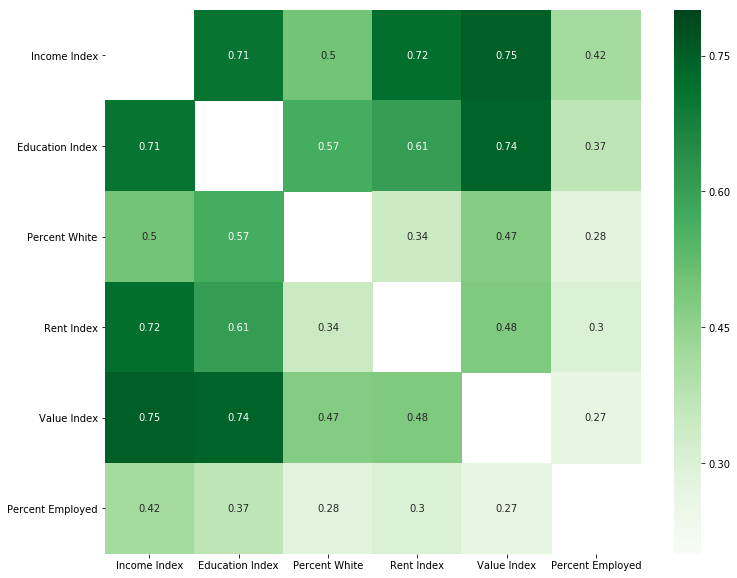

In [4]:
# create the correlation matrix
corr = data_prop.corr()
# create mask for diagonal (self correlations)
mask = corr == 1
# make the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# plot the heatmap of correlations
_ = sns.heatmap(corr, cmap='Greens', vmax=0.8, vmin=0.2, annot=True, ax=ax,
                mask=mask)
plt.savefig(os.path.join('..', 'figures', 'corr_matrix.png'),
            dpi=500, transparent=True)

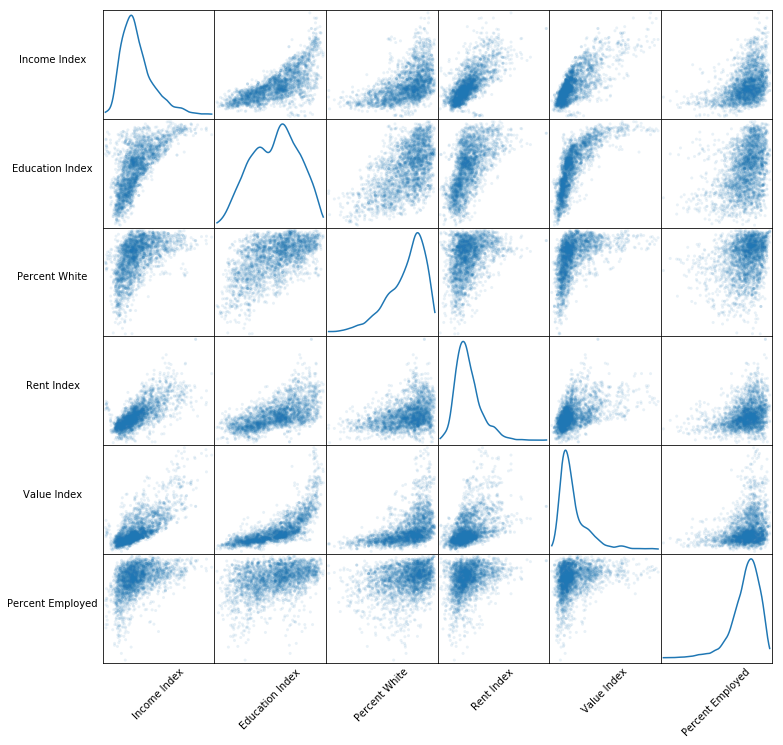

In [5]:
ax = pd.plotting.scatter_matrix(data_prop, figsize=(12, 12), alpha=0.1, 
                               diagonal='kde', marker='.')
_ = [s.yaxis.label.set_rotation(0) for s in ax.reshape(-1)]
_ = [s.xaxis.label.set_rotation(45) for s in ax.reshape(-1)]
_ = [s.get_yaxis().set_label_coords(-0.45, 0.5) for s in ax.reshape(-1)]
_ = [s.set_xticks(()) for s in ax.reshape(-1)]
_ = [s.set_yticks(()) for s in ax.reshape(-1)]
plt.savefig(os.path.join('..', 'figures', 'scatter_matrix.png'), 
            dpi=500, transparent=True)

## Income vs Home Value

/Users/tsansom/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


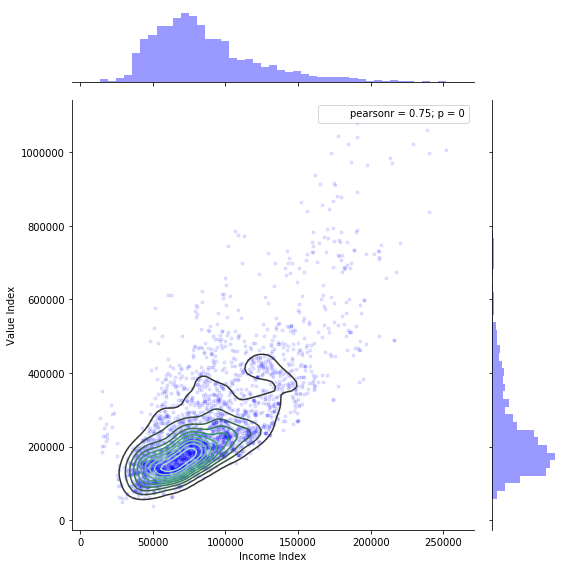

In [6]:
_ = sns.jointplot(x='Income Index', y='Value Index', data=data_prop, size=8,
                  joint_kws={'alpha': 0.1, 'marker': '.'}, color='b') \
    .plot_joint(sns.kdeplot, zorder=2)
plt.tight_layout()
plt.savefig(os.path.join('..', 'figures', 'joint_income_value.png'),
            dpi=500, transparent=True)

In [7]:
display(data.sort_values(by='income_index').head(20))

,year,income_index,education_index,white_alone,rent_index,value_index,employed
geoid,,,,,,,
48453000604,2015,13706.377011,5.031646,72.729931,1339.641269,277707.866697,88.097675
48453000603,2011,14972.318887,5.598698,72.264310,1482.178483,185330.990778,80.695308
48453000604,2016,15229.476406,5.196850,71.169208,1373.399183,350000.000000,86.900262
48453000603,2012,15249.196908,5.579088,71.211925,1553.681437,202620.209454,81.595412
48453000603,2015,15766.377718,5.358566,67.166319,1471.297923,230313.039427,88.699166
48453000603,2016,16199.134199,5.308005,65.875840,1495.461747,251939.655172,91.300909
48453000603,2014,16206.741820,5.337192,67.000000,1482.025274,202859.991567,83.796234
48453000604,2013,16734.814069,4.955247,78.821332,1381.704942,229134.917713,88.094429
48453000604,2014,17544.257384,5.276768,75.264468,1392.132567,262413.744805,88.596764


## Education vs Income

/Users/tsansom/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


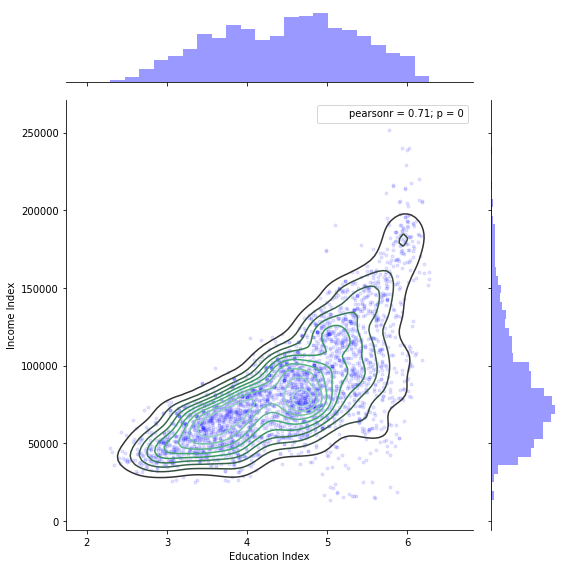

In [8]:
_ = sns.jointplot(x='Education Index', y='Income Index', data=data_prop, size=8,
                  joint_kws={'alpha': 0.1, 'marker': '.'}, color='b') \
    .plot_joint(sns.kdeplot, zorder=2)
plt.tight_layout()
plt.savefig(os.path.join('..', 'figures', 'joint_education_income.png'),
            dpi=500, transparent=True)

## Home Value vs Percentage White

/Users/tsansom/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


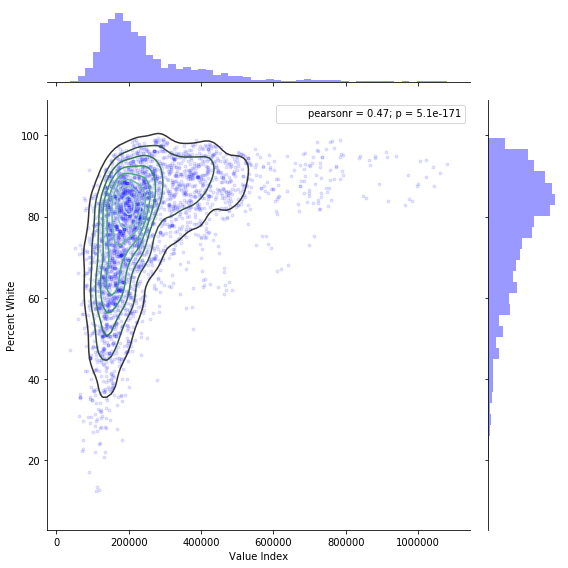

In [9]:
_ = sns.jointplot(x='Value Index', y='Percent White', data=data_prop, size=8,
                  joint_kws={'alpha': 0.1, 'marker': '.'}, color='b') \
    .plot_joint(sns.kdeplot, zorder=2)
plt.tight_layout()
plt.savefig(os.path.join('..', 'figures', 'joint_value_white.png'),
            dpi=500, transparent=True)

In [10]:
print('100 Highest Neighborhood Home Values - {:.2f}% White'.format(
    data.sort_values(by='value_index', ascending=False).iloc[:100]['white_alone'].mean()))

100 Highest Neighborhood Home Values - 89.08% White


## Neighborhood Change Over Time

In [11]:
changes_2000_2016 = data[data['year'] == '2016'][cols] \
    - data[data['year'] == '2000'][cols]
changes_2000_2016.describe()

,income_index,education_index,white_alone,rent_index,value_index,employed
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,-4849.697607,0.257668,5.783440,61.012248,62015.106784,-2.655232
std,17968.878265,0.460806,14.408348,288.696810,81597.725009,2.986356
min,-71939.649925,-1.025745,-25.987185,-1637.266622,-408007.709788,-16.355940
25%,-13984.298247,-0.003759,-3.599290,-68.485701,16199.704642,-4.225840
50%,-5956.814555,0.229539,1.966184,40.262056,45842.213994,-2.441776
75%,5086.378057,0.451697,13.515638,222.116310,96707.885621,-0.835378
max,40539.910936,1.850866,55.487687,1382.390207,360743.701625,6.265145


### Bokeh data viewer map

In [12]:
def make_source(var):
    '''make the source for the selected variable for the map'''
    source = ColumnDataSource(data=dict(
        x=xs,
        y=ys,
        name=names,
        tract=tract,
        p_var=changes_2000_2016.loc[names, var].tolist()
    ))
    return source


def make_tab(title, var):
    '''make the tab for the selected variable for the map'''
    # create the figure
    p = figure(title='{} Change from 2000 to 2016'.format(title), tools=TOOLS,
               x_axis_location=None, y_axis_location=None)
    # fill by value of selected variable
    r = p.patches('x', 'y', source=make_source(var),
                  fill_color={'field': 'p_var', 'transform': color_mapper},
                  fill_alpha=0.5, line_color='black', line_width=0.5)
    # set up hover behavior
    h = p.select_one(HoverTool)
    h.point_policy = 'follow_mouse'
    h.tooltips = [
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('{} Change'.format(title), '@p_var{0,0.11}')
    ]
    # create the tab panel
    tab = Panel(child=p, title=title)
    return tab

In [13]:
# get unique geoids in data
geoids = list(set(data.index))
# read the shapefile
tracts = Reader(os.path.join('..', 'shapefiles', 'austin_metro_tracts.shp'))
# extract the x's and y's (bokeh preferred format is list of lists)
xs, ys, names, tract = [], [], [], []
for r, g in zip(tracts.records(), tracts.geometries()):
    if int(r.attributes['GEOID']) in geoids:
        xs.append(list(g[0].exterior.coords.xy[0]))
        ys.append(list(g[0].exterior.coords.xy[1]))
        names.append(int(r.attributes['GEOID']))
        tract.append(float(r.attributes['GEOID'][-6:]) / 100)
# reverse the palette so green is positive and red is negative
palette.reverse()
# set up the color mapper (linear since some diffs are negative)
color_mapper = LinearColorMapper(palette=palette)
# choose which bokeh tools are included
TOOLS = 'pan, wheel_zoom, hover, reset, save'

# create lists for titles and variable (column) names
ts = ['Income', 'Home Value', 'Rent', 'Education',
      'Percent White', 'Percent Employed']
vs = ['income_index', 'value_index', 'rent_index',
      'education_index', 'white_alone', 'employed']
# create list to hold the tabs for each variable
tabs = [make_tab(t, v) for t, v in zip(ts, vs)]
# create the tabs widget
T = Tabs(tabs=tabs)
# save the map as HTML
_ = save(T, filename=os.path.join('..', 'figures', 'change_viewer.html'), 
         title='Changes from 2000 to 2016', resources=CDN)